In [1]:
import numpy as np
from mnist import MNIST
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# for reproducibility of the results
np.random.seed(1)

In [3]:
# read the raw images and labels
mndata = MNIST('/Users/Silvestre/Desktop/mnist')
training_images, training_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [4]:
# convert the lists to numpy array for easier manipulation
training_images = np.array([np.array(item) for item in training_images])
training_labels = np.array(training_labels)
test_images = np.array([np.array(item) for item in test_images])
test_labels = np.array(test_labels)

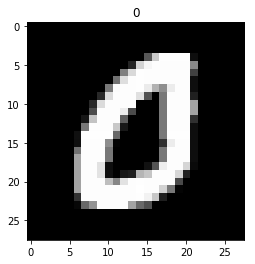

In [5]:
# pick a random item from the training set and visualize it
k = np.random.choice(len(training_images))
# reshape the vector to its image dimensions 
example_image = training_images[k].reshape((28,28))
example_label = training_labels[k]

plt.imshow(example_image, cmap='gray')
plt.title(example_label)
plt.show()

In [6]:
# finding the index of all 1s and 5s
index_1s = np.where(training_labels==1)[0]
index_5s = np.where(training_labels==5)[0]

# randomly picking 500 items of each class
random_index_for_1s = np.random.choice(index_1s, size=500, replace=False)
random_index_for_5s = np.random.choice(index_5s, size=500, replace=False)

# create 1s and 5s vectors 
training_images_1s = training_images[random_index_for_1s].T
training_labels_1s = training_labels[random_index_for_1s].T
training_images_5s = training_images[random_index_for_5s].T
training_labels_5s = training_labels[random_index_for_5s].T

In [7]:
# put all of the training data together
training_images = np.hstack((training_images_1s,training_images_5s))
training_labels = np.hstack((training_labels_1s,training_labels_5s))

# create a shuffle
random_order = np.arange(1000)
np.random.shuffle(random_order)

# shuffle the data
training_images = training_images[:,random_order]
training_labels = training_labels[random_order]

In [8]:
# pick a random item from the training set and visualize it
k = np.random.choice(len(training_images))
# your code goes here 
example_image = training_images[:,k].reshape((28,28))
example_label = training_labels[k]

# calclulate intensity and symmetry
#itns = mean_intensity(example_image.reshape(784,1)/255)[0][0]
#symm = symmetry(example_image.reshape(784,1)/255)[0][0]



# show the image
#plt.imshow(example_image, cmap='gray')
# create the title
#plt.title('label is '+str(example_label)+', '\
          #' intesty is '+'{0:.2f}'.format(itns)+', '\
         # ' symmery is '+'{0:.2f}'.format(symm) )
#plt.show()

In [9]:
# creating y from labels: 1->1 and 5->0
y = np.ones((1,len(training_labels)))
y[:,training_labels == 5] = 0

/Users/Silvestre/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


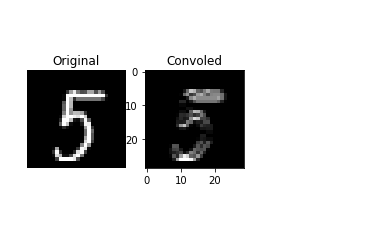

In [10]:
from scipy import signal

# pick a random image from our dataset
k = np.random.choice(len(training_images))
example_image = training_images[:,k].reshape((28,28))/255

# define a kernel
ker = np.array([[ -1, -1],
                [ 1, 1]])

# find the convolution
grad = signal.convolve2d(example_image, ker)

fig, (ax_orig, ax_mag, ax_ang) = plt.subplots(1, 3)

ax_orig.imshow(example_image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_mag.imshow(np.absolute(grad), cmap='gray')
ax_mag.set_title('Convoled')
ax_ang.set_axis_off()
fig.show()

In [11]:
#Mean horizontal edge
def h_edge(X):
    m = X.shape[1]
    ker = np.array([[ -1, -1],
                    [ 1, 1]])
    mean_horizontal_edge = np.zeros((1,m))
    for j in range(m):
        image = X[:,j].reshape((28,28))/255
        grad = signal.convolve2d(image, ker)
        mean_horizontal_edge[:,j] = np.mean(np.absolute(grad))
    return mean_horizontal_edge

In [12]:
mean_horizontal_edge = h_edge(training_images/255)
mean_horizontal_edge.shape

(1, 1000)

In [13]:
#Mean vertical edge
def v_edge(X):
    m = X.shape[1]
    ker = np.array([[ -1, 1],
                    [ -1, 1]])
    mean_vertical_edge = np.zeros((1,m))
    for j in range(m):
        image = X[:,j].reshape((28,28))/255
        grad = signal.convolve2d(image, ker)
        mean_vertical_edge[:,j] = np.mean(np.absolute(grad))
    return mean_vertical_edge

In [14]:
mean_vertical_edge = v_edge(training_images/255)
mean_vertical_edge.shape

(1, 1000)

In [15]:
#Variance of the horizontal edge
def p_edge(X):
    m = X.shape[1]
    ker = np.array([[ -1, 1],
                    [ -1, 1]])
    var_horizontal_edge = np.zeros((1,m))
    for j in range(m):
        image = X[:,j].reshape((28,28))/255
        grad = signal.convolve2d(image, ker)
        var_horizontal_edge[:,j] = np.var(np.absolute(grad))
    return var_horizontal_edge

In [16]:
var_horizontal_edge = p_edge(training_images/255)
var_horizontal_edge.shape

(1, 1000)

In [17]:
# Symmetry filter
def symmetry(X):
    # find and reshape to the original dimensions of the image
    dim = X.shape[0]
    sqr_mat = X.reshape((int(np.sqrt(dim)),int(np.sqrt(dim)),X.shape[1]))
    # flip the images horizontally
    flipped = np.flip(sqr_mat,axis=1)
    # difference of the image and its flipped
    diff = sqr_mat - flipped
    abs_diff = np.absolute(diff)
    # flatten the images back to vectors
    flatten = abs_diff.reshape(X.shape)
    # find the avrage antisymmetry and subtract from 1 for symmetry
    ave = 1 - np.mean(flatten,axis=0)
    # reshape to the appropriate shape
    ave = ave.reshape((1,ave.shape[0]))
    return ave

In [18]:
X_symmetry = symmetry(training_images/255)
print(X_symmetry.shape)

(1, 1000)


In [19]:
#Intensity filter
def mean_intensity(X):
    ave = np.mean(X,axis=0)
    # reshape to the appripriate dimensions
    ave = ave.reshape((ave.shape[0],1)).T
    return ave

In [20]:
X_intensity = mean_intensity(training_images/255)
print(X_intensity.shape)

(1, 1000)


In [21]:
#Here we collected our 3 convolution layers together
#I included the other options at the bottom comment section, feel free to compare how the data interacts
Y = np.vstack([mean_horizontal_edge , mean_vertical_edge , var_horizontal_edge]) 
# mean_vertical_edge, var_horizontal_edge, mean_horizontal_edge
#X_intensity, X_symmetry

In [23]:
#this is our 3d graph
%matplotlib 
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(1,1,1, projection='3d')


# the scatter plot
ax.scatter(Y[0], Y[1], Y[2], c=y, s=25)

plt.show(ax)

Using matplotlib backend: MacOSX


In [22]:
def hyp_fun(Y,W,b):
    
    # linear combination of inputs
    z = np.dot(W.T,Y)+b
    # sigmoid function on top of the linear function
    yhat = np.divide(1,np.array(1+np.exp(-z)))
    
    # we consider .5 as our threshhold
    # yhat>.5 -> 1 and yhat<.5 -> 0
    binary_yhat = np.zeros_like(yhat)
    for i in range(yhat.shape[1]):
        if yhat[0,i]>.5:
            binary_yhat[0,i]=1
            
    return binary_yhat

In [23]:
from tqdm import tqdm

dim = Y.shape[0]
m = Y.shape[1]

costs = []
accs = []

w = np.zeros((dim,1))
b = 0

learning_rate = 0.01

for i in range(250000):
    z = np.dot(w.T,Y)+b
    A = np.divide(1,np.array(1+np.exp(-z)))

    cost = (-1./m)*np.sum(y*np.log(A)+(1-y)*np.log((1-A)))
    
    acc = 100 - np.mean(np.abs(hyp_fun(Y,w,b) - y)) * 100

    dw = (1./m)*np.dot(Y,(A-y).T)
    db = (1./m)*np.sum(A-y)
    
    w = w - learning_rate*dw
    b = b - learning_rate*db
    
    if i % 100 == 0:
        costs.append(cost)
        accs.append(acc)

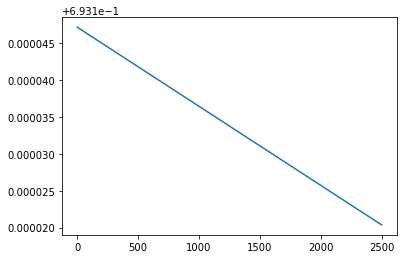

0.693120351876 0.69314718056 0.693133766072


In [24]:
# Plot learning curve (with costs)
costs = np.squeeze(costs)
plt.plot(costs)
plt.show()
print(min(costs),max(costs), np.average(costs))

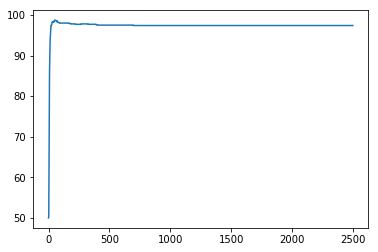

50.0 98.7 97.35868


In [25]:
# Plot accuracy
accs = np.squeeze(accs)
plt.plot(accs)
plt.show()
print(min(accs) , max(accs), np.average(accs))

In [26]:
# finding the index of all 1s and 5s
index_1s = np.where(test_labels==1)[0]
index_5s = np.where(test_labels==5)[0]

# randomly picking 500 items of each class
random_index_for_1s = np.random.choice(index_1s, size=500, replace=False)
random_index_for_5s = np.random.choice(index_5s, size=500, replace=False)

# create 1s and 5s vectors 
test_images_1s = test_images[random_index_for_1s].T
test_labels_1s = test_labels[random_index_for_1s].T
test_images_5s = test_images[random_index_for_5s].T
test_labels_5s = test_labels[random_index_for_5s].T

# put all of the training data together
test_images = np.hstack((test_images_1s,test_images_5s))
test_labels = np.hstack((test_labels_1s,test_labels_5s))

# create a shuffle
random_order = np.arange(1000)
np.random.shuffle(random_order)

# shuffle the data
test_images = test_images[:,random_order]
test_labels = test_labels[random_order]

In [27]:
# creating y from labels: 1->1 and 5->0
y = np.ones((1,len(test_labels)))
y[:,test_labels == 5] = 0

# Use the weights and bias from the model to perdict
test_meanhorizontal = h_edge(test_images/255)
test_meanvertical = v_edge(test_images/255)
test_varhorizontal = p_edge(test_images/255)
test = np.vstack([test_meanhorizontal, test_meanvertical, test_varhorizontal])
yhat = hyp_fun(test, w, b)


In [28]:
#Here is our accuracy when we ran the test data after training
acc = 100 - np.mean(np.abs(yhat - y)) * 100
print(acc)

98.6
